In [663]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold, learning_curve
from xgboost import XGBRegressor


In [664]:
train_data = pd.read_csv('C:\\Users\\issah\\OneDrive\\Desktop\\shai-ml\\train.csv')
test_data = pd.read_csv('C:\\Users\\issah\\OneDrive\\Desktop\\shai-ml\\test.csv')

In [665]:
train_data.head()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
1           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
2           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
3           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
4           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   

      y     z  
0  3.84  2.31  
1  4.23  2.63  
2  4.35  2.75  
3  3.96  2.48  
4  3.98  2.47

In [666]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [667]:
train_data["cut"].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [668]:
train_data["color"].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [669]:
train_data["clarity"].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

In [670]:
train_data.hist(bins=50, figsize=(20, 15))

array([[<AxesSubplot: title={'center': 'Unnamed: 0'}>,
        <AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>],
       [<AxesSubplot: title={'center': 'table'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'x'}>],
       [<AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'z'}>, <AxesSubplot: >]],
      dtype=object)

C:\Users\issah\AppData\Local\Temp\ipykernel_6832\3022090223.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = train_data.corr()


<AxesSubplot: >

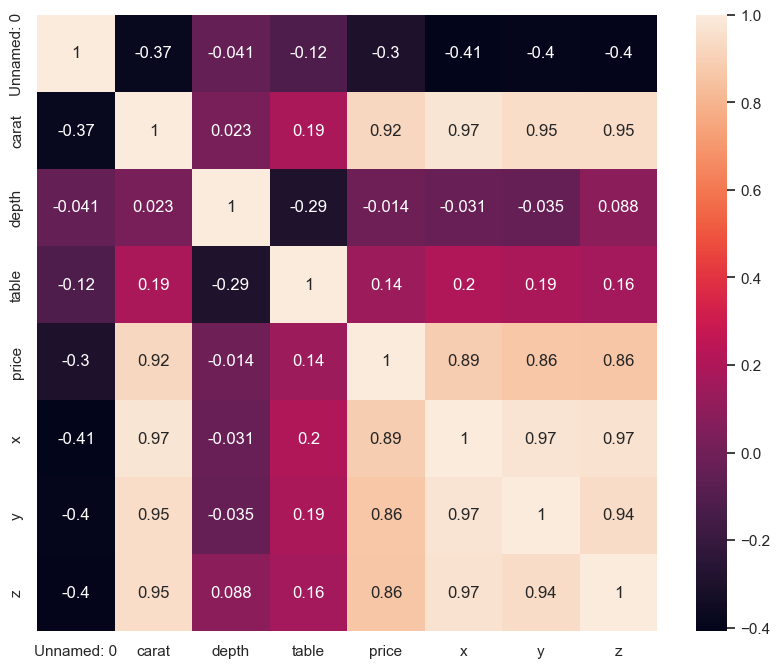

In [671]:
data_corr = train_data.corr()
data_corr
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data_corr, annot=True)

array([[<AxesSubplot: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='carat', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='depth', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='table', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='price', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='x', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='y', ylabel='Unnamed: 0'>,
        <AxesSubplot: xlabel='z', ylabel='Unnamed: 0'>],
       [<AxesSubplot: xlabel='Unnamed: 0', ylabel='carat'>,
        <AxesSubplot: xlabel='carat', ylabel='carat'>,
        <AxesSubplot: xlabel='depth', ylabel='carat'>,
        <AxesSubplot: xlabel='table', ylabel='carat'>,
        <AxesSubplot: xlabel='price', ylabel='carat'>,
        <AxesSubplot: xlabel='x', ylabel='carat'>,
        <AxesSubplot: xlabel='y', ylabel='carat'>,
        <AxesSubplot: xlabel='z', ylabel='carat'>],
       [<AxesSubplot: xlabel='Unnamed: 0', ylabel='depth'>,
        <AxesSubplot: xlabel='ca

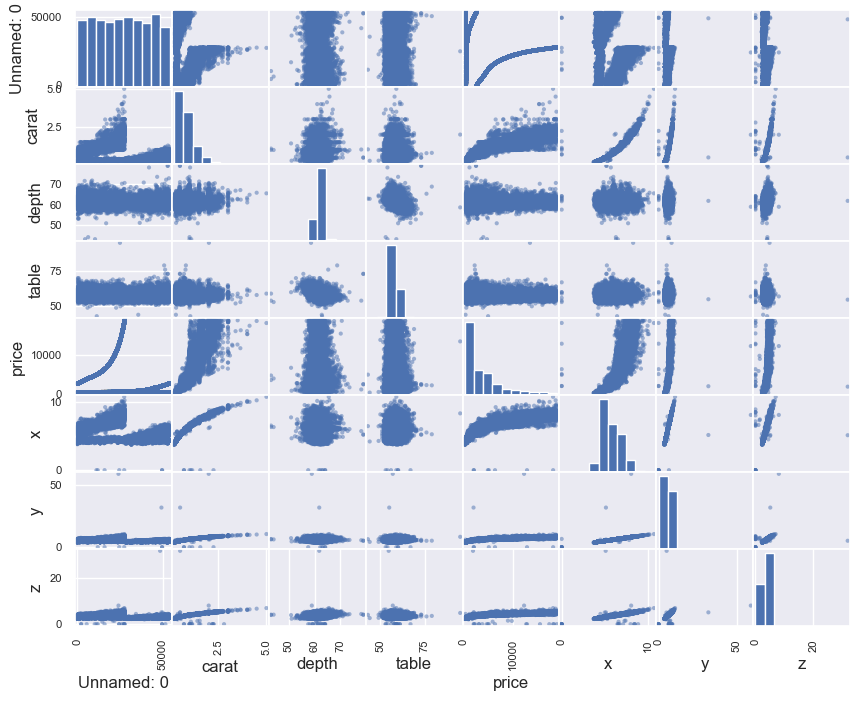

In [672]:
from pandas.plotting import scatter_matrix
num_data = train_data.drop(["cut", "color", "clarity"], axis=1)
scatter_matrix(num_data)

<AxesSubplot: xlabel='carat', ylabel='price'>

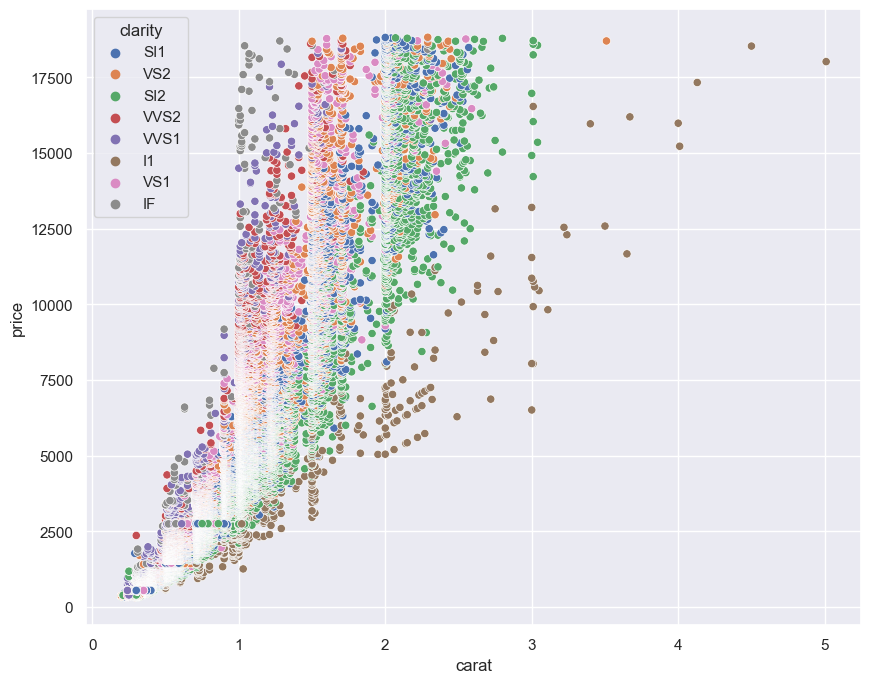

In [673]:
sns.scatterplot(data=train_data, x="carat", y="price", hue = "clarity")

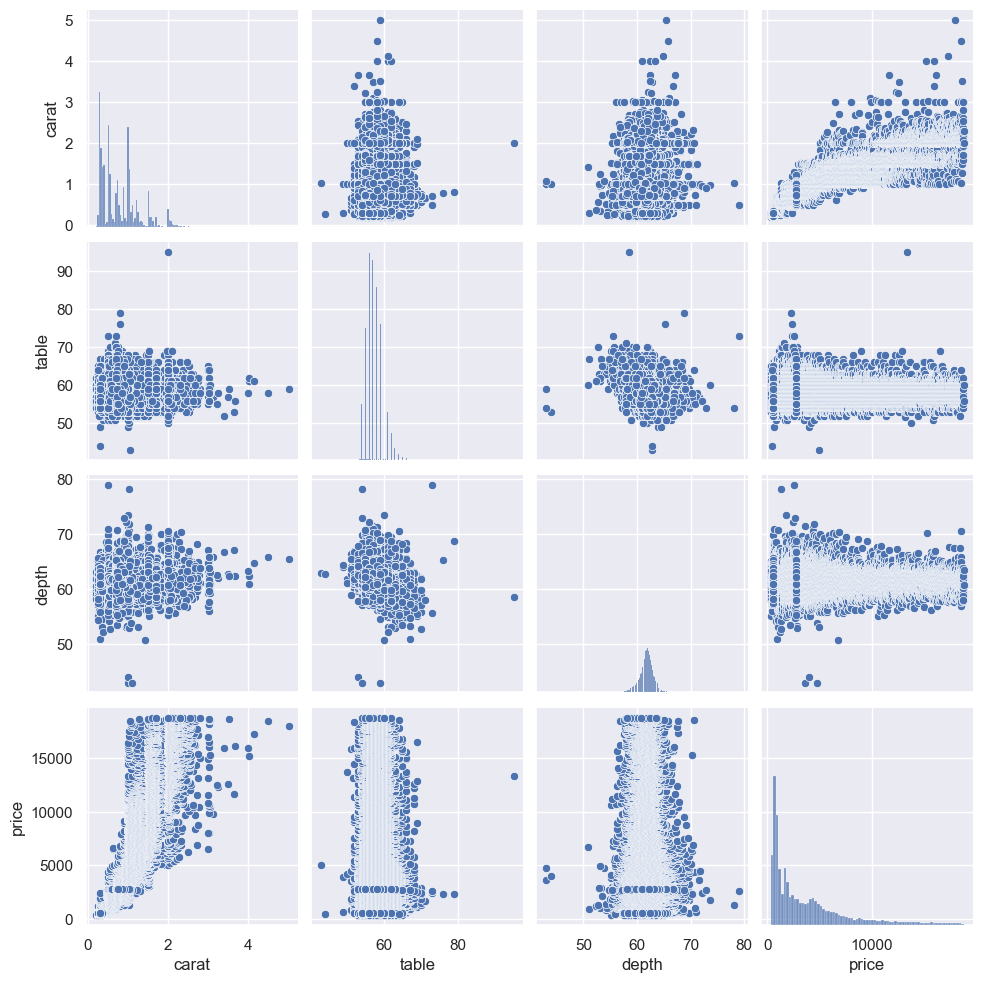

In [674]:
attributes = ["carat", "table", "depth", "price"]
sns.pairplot(data=train_data[attributes])

<AxesSubplot: xlabel='clarity', ylabel='price'>

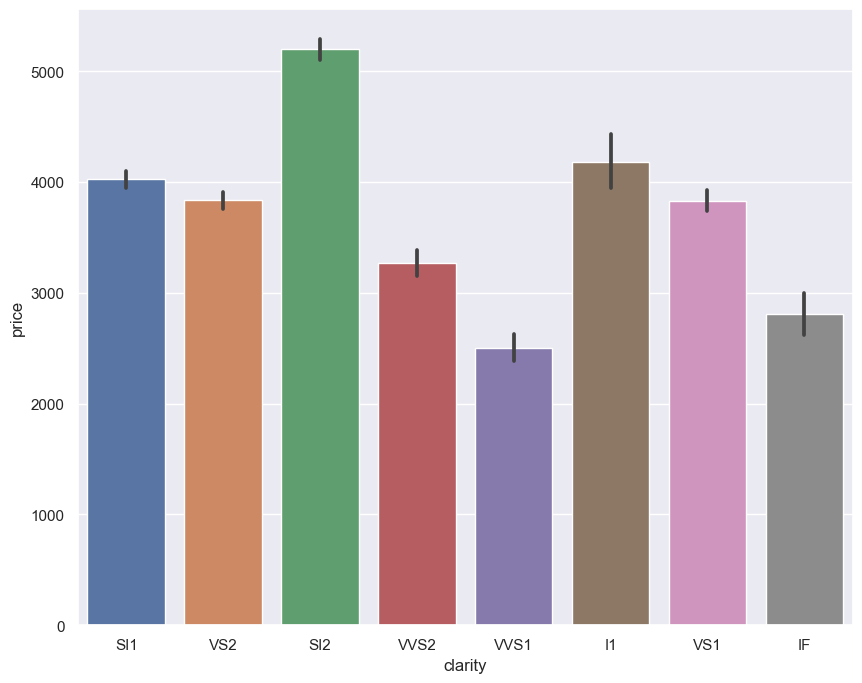

In [675]:
sns.barplot(data=train_data, x="clarity", y="price")

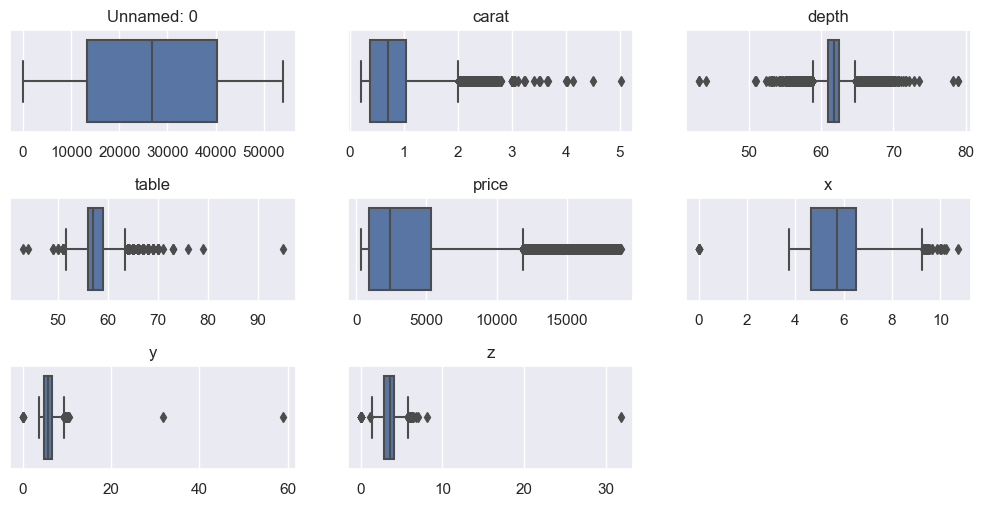

In [676]:
def box_outliars(data):
    df_count = data.select_dtypes([int, float])
    outliars_columns = []
    fig = plt.figure(figsize=(10, 10))
    for index, column in enumerate(df_count.columns, 1):
        ax = plt.subplot(6, 3, index)
        sns.boxplot(data = df_count, x=df_count[column])
        ax.set_xlabel(None)
        ax.set_title(f'{column}')
        outliars_columns.append(column)
        plt.tight_layout(w_pad=3)
    plt.show()

box_outliars(train_data)

In [677]:
def get_out(data, co):
    KNN_model = KNN(co)
    KNN_model.fit(data)
    labels = KNN_model.labels_
    outliars = data.iloc[labels == 1]
    return outliars.index

In [678]:
#OutLiers 
def outliers(data, column):
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    data[column] = [np.NAN if i >= ul or i <= ll else i for i in data[column]]
    #upper = data[column][data[column] >= ul].sort_values(ascending=False)
    #lower = data[column][data[column] <= ll].sort_values(ascending=True)
    #print(f'upper: {upper} \n lower: {lower}')
    #up = np.percentile(upper, percent, axis=0)
    #low = np.percentile(lower, 100 - percent, axis=0)
    #upper = np.where(data[column] >= up)
    #lower = np.where(data[column] <= low)
    #return {'upper': upper,'lower': lower}
    return data[column]

In [679]:
train_clean = train_data.copy()
for i in ['carat', 'depth', 'table', 'x', 'y', 'z']:
    train_clean[i] = outliers(train_data, i)
train_clean.dropna(inplace=True)

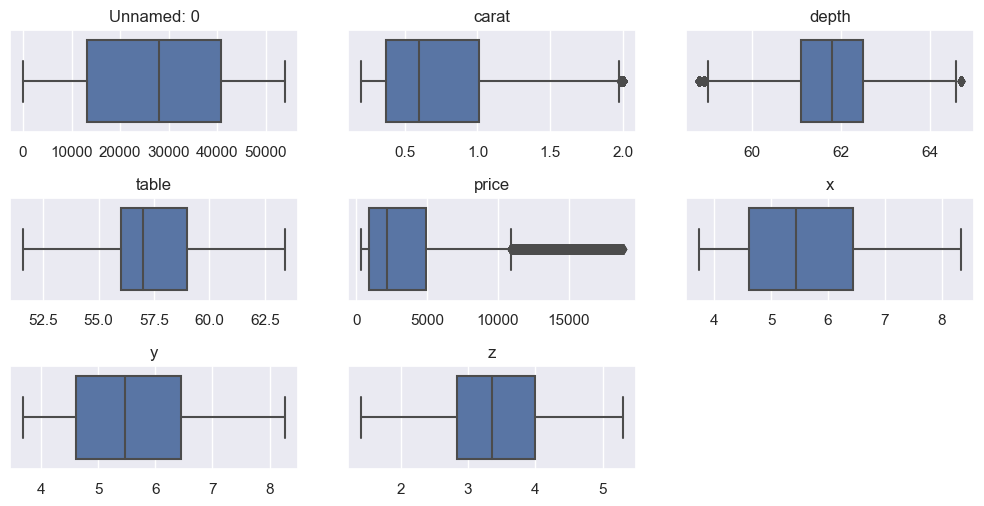

In [680]:
box_outliars(train_clean)

In [681]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39240 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  39240 non-null  int64  
 1   carat       39240 non-null  float64
 2   cut         39240 non-null  object 
 3   color       39240 non-null  object 
 4   clarity     39240 non-null  object 
 5   depth       39240 non-null  float64
 6   table       39240 non-null  float64
 7   price       39240 non-null  int64  
 8   x           39240 non-null  float64
 9   y           39240 non-null  float64
 10  z           39240 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [682]:
#train_clean.drop(['depth', 'table'],axis=1, inplace=True)


In [683]:
#test_data.drop(['depth', 'table'],axis=1, inplace=True)

In [705]:
df = train_clean.copy()

In [706]:
df

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
1               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
2               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
3               6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
4               7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
43035       53935   0.72    Premium     D     SI1   62.7   59.0   2757  5.69   
43036       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
43037       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
43038       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
43039       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.84  2.31  
1      4.23  2.63  
2      4.35  2.75  
3      3.96  2.48  
4      3.98  2.47  
...     ...   ...  
43035  5.73  3.58  
43036  5.76  3.50  
43037  5.75  3.61  
43038  6.12  3.74  
43039  5.87  3.64  

[39240 rows x 11 columns]

In [707]:
def ordinal_encode(data, columns):
    ordinal = OrdinalEncoder()
    df = pd.DataFrame(ordinal.fit_transform(data[columns]), index=data[columns].index)
    #data[columns] = df
    return data.join(df)

def one_hot_encode(data, columns):
    one_hot = OneHotEncoder()
    df = pd.DataFrame(one_hot.fit_transform(data[columns]).toarray(), index=data[columns].index)
    data = data.drop(columns, axis=1)
    data = data.join(df)
    return data

def cat_encode(data):
    data['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
    data['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
    data['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)
    return data


In [708]:
#df = one_hot_encode(train_clean, ['color'])
#test_data = one_hot_encode(test_data, ['color'])


In [709]:

X_train = df.drop('price', axis=1)
y_train = df['price']
X_test = test_data.copy()
num_attr = ['Unnamed: 0', 'carat', 'table', 'x', 'y', 'z']

In [710]:
X_train = cat_encode(X_train)
X_test = cat_encode(X_test)

In [732]:
X_train.drop('depth', axis=1, inplace=True)
X_test.drop('depth', axis=1, inplace=True)


In [733]:
(df.isna()).sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [734]:
train_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39240 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  39240 non-null  int64  
 1   carat       39240 non-null  float64
 2   cut         39240 non-null  object 
 3   color       39240 non-null  object 
 4   clarity     39240 non-null  object 
 5   depth       39240 non-null  float64
 6   table       39240 non-null  float64
 7   price       39240 non-null  int64  
 8   x           39240 non-null  float64
 9   y           39240 non-null  float64
 10  z           39240 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [735]:
cat_attr = ['cut', 'clarity']
cat_attr


['cut', 'clarity']

In [736]:
num_pipeline = Pipeline([
    ('scaler', RobustScaler())
    ])
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attr),
 #("cat", OneHotEncoder(), cat_attr)
 ])

In [737]:
X_train

Unnamed: 0  carat  cut  color  clarity  table     x     y     z
0               2   0.21    4      6        3   61.0  3.89  3.84  2.31
1               4   0.29    4      2        4   58.0  4.20  4.23  2.63
2               5   0.31    2      1        2   58.0  4.34  4.35  2.75
3               6   0.24    3      1        6   57.0  3.94  3.96  2.48
4               7   0.24    3      2        7   57.0  3.95  3.98  2.47
...           ...    ...  ...    ...      ...    ...   ...   ...   ...
43035       53935   0.72    4      7        3   59.0  5.69  5.73  3.58
43036       53936   0.72    5      7        3   57.0  5.75  5.76  3.50
43037       53937   0.72    2      7        3   55.0  5.69  5.75  3.61
43038       53939   0.86    4      3        2   58.0  6.15  6.12  3.74
43039       53940   0.75    5      7        2   55.0  5.83  5.87  3.64

[39240 rows x 9 columns]

In [738]:
data_prepared = full_pipeline.fit_transform(X_train)

In [739]:
X_test

Unnamed: 0  carat  cut  color  clarity  table     x     y     z
0               1   0.23    5      6        2   55.0  3.95  3.98  2.43
1               3   0.23    2      6        5   65.0  4.05  4.07  2.31
2               8   0.26    3      3        3   55.0  4.07  4.11  2.53
3              10   0.23    3      3        5   61.0  4.00  4.05  2.39
4              12   0.23    5      1        5   56.0  3.93  3.90  2.46
...           ...    ...  ...    ...      ...    ...   ...   ...   ...
10895       53922   0.70    3      6        4   60.0  5.59  5.65  3.53
10896       53923   0.70    3      7        5   59.0  5.67  5.58  3.55
10897       53933   0.70    3      6        4   59.0  5.71  5.76  3.47
10898       53934   0.70    3      6        4   59.0  5.69  5.72  3.49
10899       53938   0.70    3      7        3   60.0  5.66  5.68  3.56

[10900 rows x 9 columns]

In [740]:
train_to_predict = full_pipeline.transform(X_train)
test_pre = full_pipeline.transform(X_test)

In [741]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [742]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold, error_score='raise' )
kf_cv_scores= np.sqrt(-kf_cv_scores)
print("K-fold CV average score: %.2f +/- %.2f" % (kf_cv_scores.mean(), kf_cv_scores.std()))

K-fold CV average score: 29.90 +/- 4.32


In [743]:
final_predictions = xgb.predict(X_test)

In [744]:
submessions = test_data[["Unnamed: 0"]]
submessions["price"] = final_predictions
submessions
submessions.to_csv("last_submission.csv", index=None)

C:\Users\issah\AppData\Local\Temp\ipykernel_6832\1489845134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submessions["price"] = final_predictions


In [745]:
param_grid = xgb.get_params
print(param_grid)

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)>
